<a href="https://colab.research.google.com/github/ArjunShenoy14/FinalProject/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/train.csv')


In [ ]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Cleaning


In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
# Print data types of DataFrame
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df=df.drop_duplicates()

In [ ]:
sns.countplot(x=df.y,data=df)
plt.xlabel=("target")
plt.title("count of target variable")
plt.plot()

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job']=df['job'].replace("unknown",np.nan)

In [ ]:
df['marital'].value_counts()

In [ ]:
df['education_qual'].value_counts()

In [ ]:
'''df['education_qual']=df['education_qual'].replace("unknown",np.nan)'''

In [ ]:
df['call_type'].value_counts()

In [ ]:
df['day'].value_counts()

In [ ]:
df['mon'].value_counts()

In [ ]:
df['dur'].value_counts()

In [ ]:
df['num_calls'].value_counts()

In [ ]:
df.isna().sum()

age                 0
job               288
marital             0
education_qual      0
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
dtype: int64

In [ ]:
df.dropna(subset=["job"], inplace=True)
#df.dropna(subset=["education_qual"], inplace=True)

In [ ]:
df.shape

In [ ]:
#outlier detection for dur
IQR=df['dur'].quantile(0.75)-df["dur"].quantile(0.25)
UL=df.dur.quantile(0.75)+(1.5*IQR)
LL=df.dur.quantile(0.25)-(1.5*IQR)
print(UL,LL)

643.0 -221.0


In [ ]:
df.dur=df.dur.clip(LL,UL)

In [ ]:
#outlier detection for num_calls
IQR=df['num_calls'].quantile(0.75)-df["num_calls"].quantile(0.25)
UL=df.num_calls.quantile(0.75)+(1.5*IQR)
LL=df.num_calls.quantile(0.25)-(1.5*IQR)
print(UL,LL)

6.0 -2.0


In [ ]:
df.num_calls=df.num_calls.clip(LL,UL)

In [ ]:
df["target"]=df['y'].map({"yes":1,"no":0})

In [ ]:
df.groupby("prev_outcome")["target"].mean()

In [ ]:
df.groupby("job")["target"].mean()

In [ ]:
df.groupby("marital")["target"].mean()

In [ ]:
df.groupby("education_qual")["target"].mean()

In [ ]:
df.groupby("call_type")["target"].mean()

# Exploratory Data Analysis

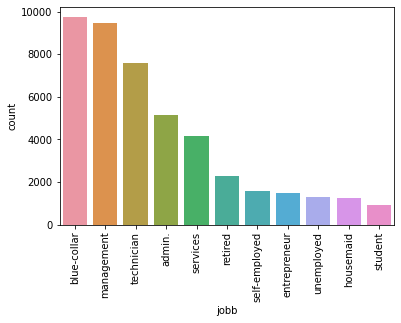

In [ ]:
df_j=pd.DataFrame(df.job.value_counts()).sort_values("job", ascending=False).reset_index()
df_j.rename(columns={"index":"jobb","job":"count"} ,inplace=True)
bar=sns.barplot(x=df_j["jobb"],y=df_j["count"],data=df_j)
bar.tick_params(axis='x', rotation=90)

categorical

<AxesSubplot:ylabel='job'>

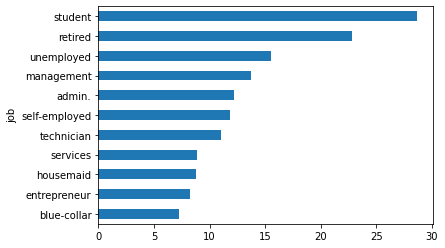

In [ ]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

<AxesSubplot:ylabel='marital'>

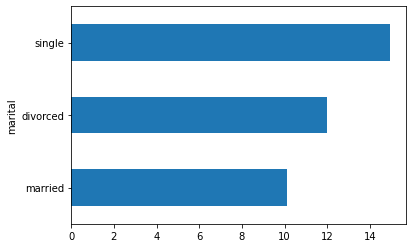

In [ ]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind="barh")#label encoding 

<AxesSubplot:ylabel='education_qual'>

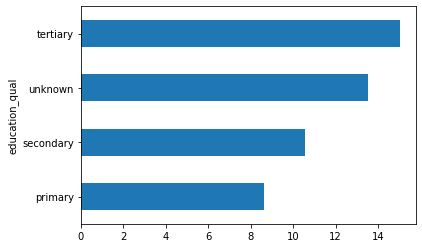

In [ ]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind="barh")#label encoding 

<AxesSubplot:ylabel='call_type'>

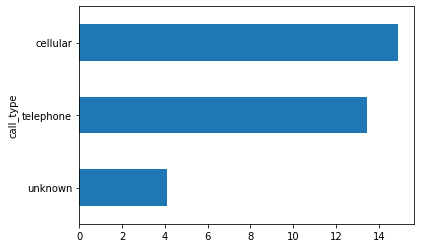

In [ ]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind="barh")#label encoding 

<AxesSubplot:ylabel='prev_outcome'>

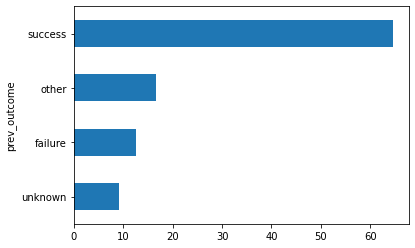

In [ ]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind="barh")#label encoding 

<AxesSubplot:ylabel='mon'>

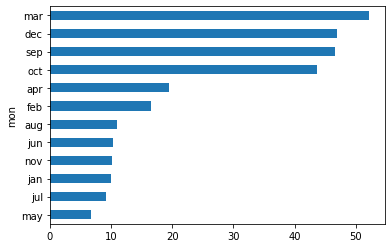

In [ ]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh")#label encoding 

<AxesSubplot:ylabel='day'>

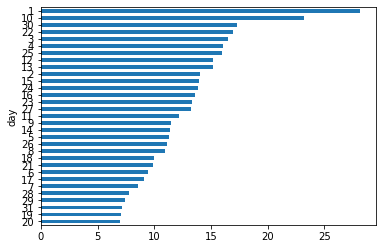

In [ ]:
(df.groupby("day")["target"].mean()*100).sort_values().plot(kind="barh")

continuous

In [ ]:
df.head(1)

<AxesSubplot:xlabel='y', ylabel='age'>

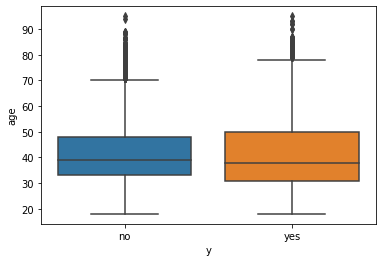

In [ ]:
#df.groupby("age")["target"]
sns.boxplot(data=df, x=df.y, y=df.age)

<AxesSubplot:xlabel='y', ylabel='dur'>

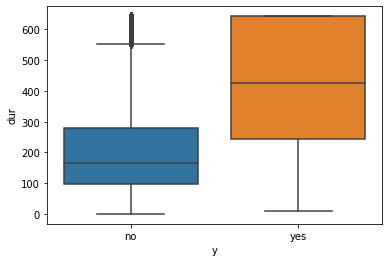

In [ ]:
sns.boxplot(data=df, x=df.y, y=df.dur)

<AxesSubplot:xlabel='y', ylabel='num_calls'>

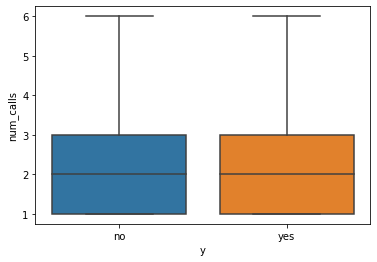

In [ ]:
sns.boxplot(data=df, x=df.y, y=df.num_calls)

# Encoding

In [ ]:
df.head(510)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139.0,1.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
508,60,retired,married,secondary,unknown,6,may,80.0,1.0,unknown,no,0
509,26,admin.,single,secondary,unknown,6,may,232.0,1.0,unknown,no,0
510,58,retired,married,secondary,unknown,6,may,118.0,1.0,unknown,no,0
511,34,admin.,married,secondary,unknown,6,may,190.0,1.0,unknown,no,0


In [ ]:
'''col=df["job"].unique()
P=[]
for i in col:
  p=len(df[df["job"]==i][df["y"]=="yes"])/len(df[df["job"]==i])
  P.append(p)
dff=pd.DataFrame({"job":col,"%":P})
dff=dff.sort_values("%",ascending=True)
dff=dff.reset_index()
del dff["index"]'''

In [ ]:
'''dff'''

,job,%
0,blue-collar,0.072765
1,entrepreneur,0.082717
2,housemaid,0.087903
3,services,0.088851
4,technician,0.110585
5,self-employed,0.118429
6,admin.,0.122050
7,management,0.137570
8,unemployed,0.155027
9,retired,0.227915


In [ ]:
df['job'] = df['job'].map({"blue-collar" : 1 , "entrepreneur" : 2 , "housemaid" : 3 , "services" : 4 , "technician" : 5 , "self-employed" : 6 , "admin." : 7 , "management" : 8 , "unemployed" : 9 , "retired" : 10 , "student" : 11})

In [ ]:
df.isna().sum()

In [ ]:
df['marital']=df['marital'].map({"married" : 1 , "divorced" : 2 , "single" : 3})

In [ ]:
df['education_qual']=df['education_qual'].map({"primary" : 1 , "secondary" : 2 , "unknown" : 3, "tertiary":4})

In [ ]:
df['call_type']=df['call_type'].map({"unknown" : 1 , "telephone" : 2 , "cellular" : 3})

In [ ]:
df['mon']=df['mon'].map({"may" : 1 , "jul" : 2 , "jan" : 3 , "nov" : 4 , "jun" : 5 , "aug" : 6 , "feb" : 7 , "apr" : 8 , "oct" : 9 , "sep" : 10 , "dec" : 11, "mar" : 12})

In [ ]:
df['prev_outcome']=df['prev_outcome'].map({"unknown" : 1 , "failure" : 2 , "other" : 3, "success":4})

In [ ]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,4,1,5,1,261.0,1.0,1,no,0
1,44,5,3,2,1,5,1,151.0,1.0,1,no,0
2,33,2,1,2,1,5,1,76.0,1.0,1,no,0
3,47,1,1,3,1,5,1,92.0,1.0,1,no,0
5,35,8,1,4,1,5,1,139.0,1.0,1,no,0


In [ ]:
df.dtypes

In [ ]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7.0,0,3,0,5,0,261.0,1.0,0,no,0
1,44,4.0,2,1,0,5,0,151.0,1.0,0,no,0


# Splitting the Dataset

In [ ]:
'''x1=df[['age','job', 'marital', 'education_qual', 'call_type','day','mon','dur','num_calls','prev_outcome']].values
y1=df["target"].values'''

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size=0.3, random_state=1)'''

In [ ]:
col=[*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [ ]:
x=df.loc[:, col[:-2]].values
y=df.loc[:, col[-1]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Balancing Dataset using SMOTEENN

In [ ]:
df.shape

(44917, 12)

In [ ]:
len(x_train),len(y_train)

(33687, 33687)

In [ ]:
from imblearn.combine import SMOTEENN
smt= SMOTEENN(sampling_strategy="all")
x_smt, y_smt = smt.fit_resample(x_train,y_train)

In [ ]:
len(x_smt),len(y_smt)

(51133, 51133)

In [ ]:
df_bal=pd.DataFrame(x_smt, columns=df.columns[:-2])

In [ ]:
df_bal["y"]=y_smt

In [ ]:
len(df_bal[df_bal["y"]==1])/len(df_bal)

0.5608706706041109

# Scaling of dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_smt)
x_test_scaled=scaler.transform(x_test)

# Classification

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(x_train_scaled,y_smt)

LogisticRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

[0.65537101]
[[ 0.09450603  0.4629012   0.28908205  0.20111982  0.47675912 -0.03351197
   1.2637855   2.79483569 -0.43846003  0.93303625]]


In [ ]:
score = lr.score(x_test_scaled,y_test)
print(score)
print(score * 100,"%")

0.7691896705253785
76.91896705253785 %


In [ ]:
log=roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:, 1])
log

0.8911335378366096

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
k = 4
#Train Model and Predict 
modelk = KNeighborsClassifier(n_neighbors = k).fit(x_train_scaled,y_smt)

In [ ]:
yhat = modelk.predict(x_test_scaled)

In [ ]:
modelk.score(x_test_scaled,y_test)

0.8271593944790739

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_smt, modelk.predict(x_train_scaled)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
kn=roc_auc_score(y_test,modelk.predict_proba(x_test_scaled)[:, 1])

Train set Accuracy:  0.9756321749163945
Test set Accuracy:  0.8271593944790739


In [ ]:
kn

0.8624871011163903

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier( max_depth = 10)
dt.fit(x_train_scaled,y_smt)
dt.score(x_test_scaled,y_test)

0.8333036509349956

In [ ]:
d=roc_auc_score(y_test,dt.predict_proba(x_test_scaled)[:, 1])
d

0.8707842374930014

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_scaled,y_smt)

RandomForestClassifier(random_state=0)

In [ ]:
rf.score(x_test_scaled,y_test)

0.8683882457702582

In [ ]:
r=roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:, 1])
r

0.9193268147625215

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
for l in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3]:
  xg=xg=xgb.XGBClassifier(learning_rate=l, n_estimators=100,verbosity=0)
  xg.fit(x_train_scaled,y_smt)
  
  print("LR: ",l," train score: ",xg.score(x_test_scaled,y_test)," cv: ",np.mean(cross_val_score(xg,x_train_scaled,y_smt,cv=10)))

In [ ]:
xg=xgb.XGBClassifier(learning_rate=0.26, n_estimators=100,verbosity=0)
xg.fit(x_train_scaled,y_smt)
xb=roc_auc_score(y_test,xg.predict_proba(x_test_scaled)[:, 1])
xb

0.9248516681324096

In [ ]:
xg.score(x_test_scaled,y_test)

0.8804986642920748

# AUROC comparison

In [ ]:
aur=pd.DataFrame({"Model":["Logistic Regression","KNN","Decision Tree","Random Forest","XGBoost"],"AUROC":[log,kn,d,r,xb]})

In [ ]:
aur

,Model,AUROC
0,Logistic Regression,0.891134
1,KNN,0.862487
2,Decision Tree,0.870784
3,Random Forest,0.919327
4,XGBoost,0.924852


In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(aur,x="Model",y="AUROC",title="Model vs AUROC")
fig.show()

In [ ]:
imp_feature=pd.DataFrame({"feature":col[:-2],"imp":xg.feature_importances_})
imp_feature.sort_values("imp",ascending=False, inplace=True)

In [ ]:
imp_feature

,feature,imp
4,call_type,0.219607
9,prev_outcome,0.197151
7,dur,0.171369
6,mon,0.121699
3,education_qual,0.082069
2,marital,0.079330
8,num_calls,0.054327
1,job,0.035316
5,day,0.022713
0,age,0.016418
